In [153]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import math

In [2]:
import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np

In [ ]:
dl = DataLib("SignalData")

In [4]:
LongRates = dl.pull('LongRates')
ShortRates = dl.pull('ShortRates')

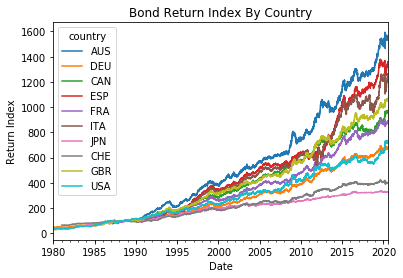

In [5]:
#1
BondReturnIndex = dl.pull('BondRetIdx/LocalFX')
BondReturnIndex.plot()
plt.xlabel('Date')
plt.ylabel('Return Index')
plt.title('Bond Return Index By Country')
plt.show()
# clearly austrailian bonds have produced the highest returns and japanese bonds have produced the lowest returns

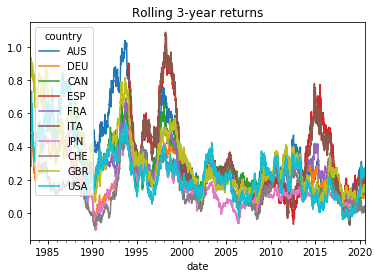

In [13]:
#2
WEEKDAYS_IN_YEAR = 261
BondReturnIndex.tail(10)
RGDPChangeRollingMean = BondReturnIndex.pct_change(WEEKDAYS_IN_YEAR*3, fill_method = None).dropna(how='all')
RGDPChangeRollingMean.plot()
plt.title('Rolling 3-year returns')
plt.show()
#1990's recession in australia probably led to decreased interest rates
# japan in the 2000's higher interest rates? after the lost decade(s)

In [196]:
#3 hedging
ExchangeRates_USD = dl.pull('fxVsUSD')
ExchangeRates_USD.tail()
PercentChange_FX = ExchangeRates_USD.pct_change()

Unhedged_BondReturns = BondReturnIndex.resample('1M').mean()*(ExchangeRates_USD)

# ExchangeRates_USD['GBR'].pct_change().plot()
# plt.show()

# country = 'GBR'
# BondReturnIndex[country].plot()
# Hedged_BondReturns[country].plot()
# plt.title(f'{country} Hedged Bonds vs. Normal Bonds')
# plt.legend(['Normal', 'Hedged'])
# plt.show()

country = 'GBR'
Unhedged_BondReturns[country].loc[pd.Period('1992-01'):pd.Period('1993-01')].plot()
(BondReturnIndex[country]*(1-0.002)).loc[pd.Period('1992-01'):pd.Period('1993-01')].plot()
plt.title(f'{country} Hedged Bonds vs. Normal Bonds')
plt.legend(['Normal', 'Hedged'])
plt.show()

ExchangeRates_USD.tail()

country,AUS,DEU,CAN,ESP,FRA,ITA,JPN,CHE,GBR,USA
date,,,,,,,,,,
2020-04,1.5862,1.8006,1.4058,153.1831,6.0391,1782.626,107.7285,0.9710,1.2410,1.0934
2020-05,1.5353,1.7940,1.3970,152.6218,6.0169,1776.093,107.2668,0.9707,1.2300,1.1107
2020-06,1.4494,1.7378,1.3550,147.8383,5.8284,1720.427,107.6050,0.9511,1.2526,1.1237
2020-07,NaN,1.7062,NaN,145.1455,5.7222,1689.090,NaN,NaN,NaN,NaN
2020-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Average Annual Return
0.00035668367972613443
Variance
8.223424605661084e-05
Sharpe ratio
0.007282867922585941


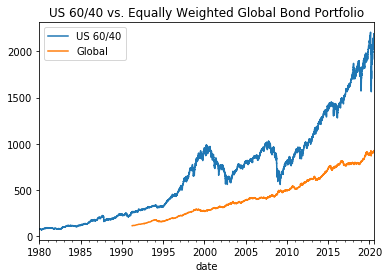

In [105]:
#4
#generate the 60/40 equities/bonds portfolio
Equities = dl.pull('EquityPrices')
Equities_annual_return = Equities.pct_change()
BondReturnIndex_annual_return = BondReturnIndex.pct_change()
US_60_40 = .6*Equities['USA'] + .4*BondReturnIndex['USA']
# US_60_40.tail()
print('Average Annual Return')
print(US_60_40.pct_change().mean())
print('Variance')
print(US_60_40.pct_change().std()**2)
# print(Equities_annual_return['USA'].mean())
# print(Equities_annual_return['USA'].std()**2)
# print(BondReturnIndex_annual_return['USA'].mean())
# print(BondReturnIndex_annual_return['USA'].std()**2)
diff = (Equities_annual_return - BondReturnIndex_annual_return)['USA']
print('Sharpe ratio')
print(diff.mean()/diff.std())



# just assume that the portfolio is equal weighting for all countries. Suppose that this investor doesn't know anything
all_countries = Equities.columns
BondReturnIndex['Global Bond Portfolio'] = sum([1/(len(all_countries)) * BondReturnIndex[country] for country in all_countries])
BondReturnIndex.tail()


US_60_40.plot()
BondReturnIndex['Global Bond Portfolio'].plot()
plt.title('US 60/40 vs. Equally Weighted Global Bond Portfolio')
plt.legend(['US 60/40', 'Global'])
plt.show()





In [109]:
#5
M2 = dl.pull('M2/inUSD')
M2.tail()

M1 = dl.pull('M1/inUSD')
M1.tail()

# HAVE NO IDEA HOW TO DO THIS, JUST MOVE ON SYSTEM DESIGN

country,AUS,DEU,CAN,ESP,FRA,ITA,JPN,CHE,GBR,USA
date,,,,,,,,,,
2020-04,802.623,2698.549,850.737,1255.163,1715.395,1423.136,7878.972,724.529,2508.774,4797.4
2020-05,828.763,2770.083,885.669,1280.755,1811.060,1465.355,8036.959,732.001,2493.515,5031.9
2020-06,870.013,2821.998,NaN,1297.358,NaN,NaN,8246.856,752.138,2521.784,5210.0
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


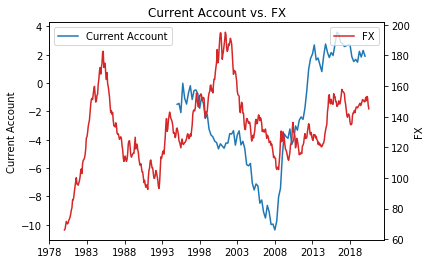

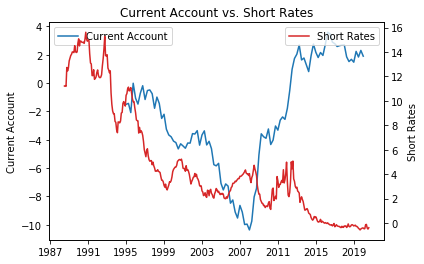

In [124]:
#6
CurrentAccount = dl.pull('CurrAcctPctGDP')
FX = dl.pull('fxVsUSD')
IR = dl.pull('ShortRates')

country = 'ESP'

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'Current Account'
ax1.plot(CurrentAccount[country].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'FX'
ax2.plot(FX[country].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title('Current Account vs. FX')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'Current Account'
ax1.plot(CurrentAccount[country].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Short Rates'
ax2.plot(IR[country].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title('Current Account vs. FX and Short Rates')
plt.show()

# this data doesn't really bear out in a significant way. does not seem like a strong indicator

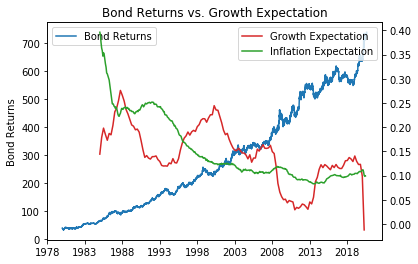

In [156]:
#7

Inflation = dl.pull('CoreCPI/SA')
RGDP = dl.pull('GDP/Real')

country = 'USA'

Lagged_Inflation = Inflation.pct_change(12*5, fill_method = None).dropna(how='all')
Lagged_RGDP = RGDP.pct_change(4*5, fill_method = None).dropna(how='all')

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'Bond Returns'
ax1.plot(BondReturnIndex[country].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Lagged 5 yr idx'
ax2.plot(Lagged_RGDP[country].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.plot(Lagged_Inflation[country].to_timestamp(), color = 'tab:green', label = ax2_label)
# ax2.set_ylabel(ax2_label)
ax2.legend(['Growth Expectation', 'Inflation Expectation'])
plt.title('Bond Returns vs. Growth Expectation')
plt.show()

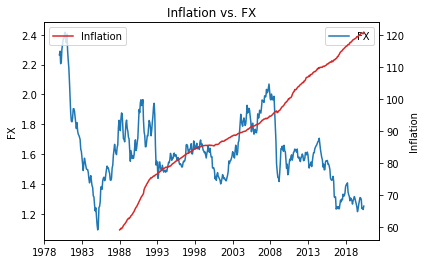

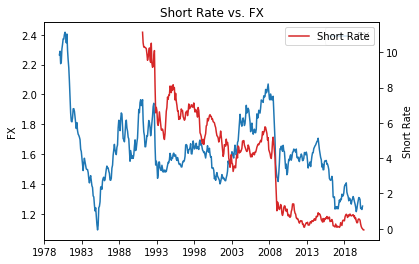

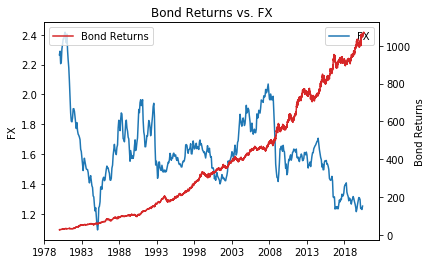

In [192]:
#8 my own question of a claim made in the prospectus
# FX appreciation -> lower inflation and lower rates? -> higher bond yields?
FX = dl.pull('fxVsUSD')
FX.tail()
country = 'GBR'

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'FX'
ax1.plot(FX[country].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Inflation'
ax2.plot(Inflation[country].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title('Inflation vs. FX')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'FX'
ax1.plot(FX[country].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Short Rate'
ax2.plot(IR[country].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title('Short Rate vs. FX')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'FX'
ax1.plot(FX[country].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Bond Returns'
ax2.plot(BondReturnIndex[country].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title('Bond Returns vs. FX')
plt.show()

# this also doesn't look like a particularly strong indicator...

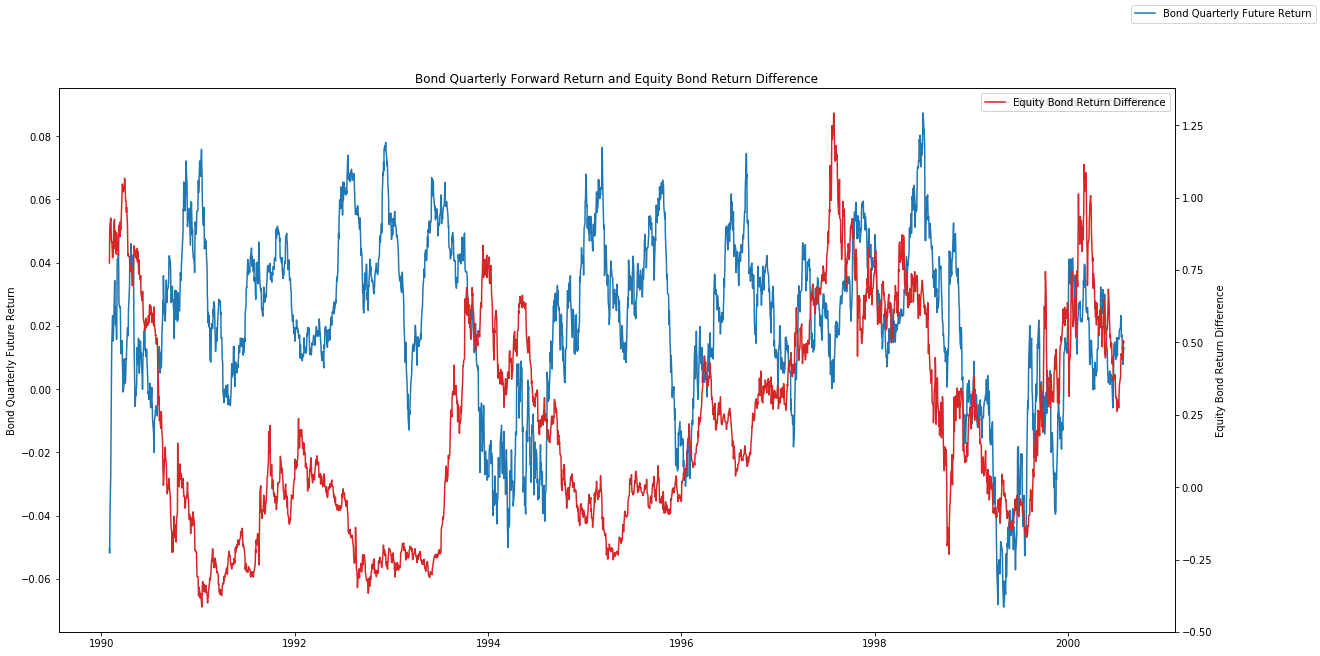

In [272]:
# INDICATOR CONSIDERATION 1

# relative stock and bond performance
# maybe during a time of economic growth, and a differential between stock and bond returns 

WEEKDAYS_IN_YEAR = 261
QUARTER_YEAR = 65
country = 'DEU'
BondReturnIndex = dl.pull('BondRetIdx/LocalFX')


Bond_semiannual_return = BondReturnIndex.pct_change(QUARTER_YEAR, fill_method = None)
Bond_semiannual_return = Bond_semiannual_return.shift(-QUARTER_YEAR) # this will be "future returns" (starting today) instead of past returns (starting 6 months ago)
Equity_Bond_Differential_Year = (Equities - BondReturnIndex).pct_change(WEEKDAYS_IN_YEAR, fill_method = None)

# Equity_Bond_Differential_Year[country].loc[pd.Period('2010-01'):pd.Period('2015-07')].plot()
# Bond_annual_return[country].loc[pd.Period('2010-01'):pd.Period('2015-07')].plot()

# plt.show()


fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
ax2 = ax1.twinx()
ax1_label = 'Bond Quarterly Future Return'
ax1.plot(Bond_semiannual_return[country].loc[pd.Period('1990-01'):pd.Period('2000-07')].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Equity Bond Return Difference'
ax2.plot(Equity_Bond_Differential_Year[country].loc[pd.Period('1990-01'):pd.Period('2000-07')].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title('Bond Quarterly Forward Return and Equity Bond Return Difference')
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

# NOTE: THIS IS ACTUALLY KIND OF PROMISING!! FIND WAY TO IMPROVE ON THIS (PERHAPS THERE IS ANOTHER MISSING FACTOR)

In [ ]:
# INDICATOR 2

In [ ]:
# INDICATOR 3